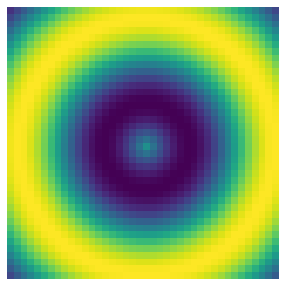

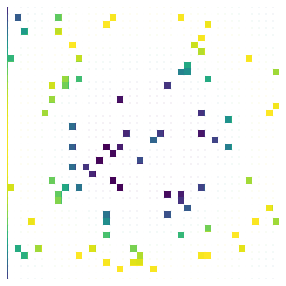

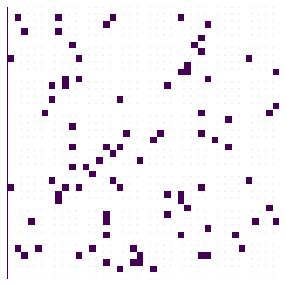

In [4]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
# R = X + Y
Z = np.sin(-R)

fig = plt.figure(figsize=[5, 5])
plt.imshow(Z)
plt.axis('off')
plt.savefig("paper_figs/diagram_recon_landscape.svg", bbox_inches='tight')

mask = np.random.uniform(0, 1, size=Z.shape)

# Z_masked = Z * mask

ids = np.where(mask > 0.05)

# print(ids.shape)
# print(ids)

fig = plt.figure(figsize=[5, 5])
plt.imshow(Z)
plt.scatter(ids[0], ids[1], c='white', marker='s')
plt.axis('off')
plt.savefig("paper_figs/diagram_sampled_landscape.svg", bbox_inches='tight')

zero = np.ones_like(Z)
fig = plt.figure(figsize=[5, 5])
plt.imshow(zero)
plt.scatter(ids[0], ids[1], c='white', marker='s')
plt.axis('off')
plt.savefig("paper_figs/diagram_sample_positions.svg", bbox_inches='tight')


In [9]:
def get_handcraft_landscape():
    return Z

FIG_PATH = 'flower.jpg'

def bgr_to_rgb(img):
    # return get_handcraft_landscape()
    b,g,r = cv2.split(img) 
    img_rgb = cv2.merge([r,g,b]) 
    return img_rgb

def get_rgb_img():
    # return get_handcraft_landscape()
    return bgr_to_rgb(cv2.imread(FIG_PATH, 1)[250:1350, 100:800, :])

def get_gray_img():
    # return get_handcraft_landscape()
    return cv2.imread(FIG_PATH, 0)[250:1350, 100:800]
    

def low_filter(f, thr):
    m, n = f.shape

    # mask = np.zeros_like(f)
    f1 = f.copy()
    # for i in range(m//4, 3 * m//4):
    #     for j in range(n//4, 3 * n // 4):
    #         mask[i][j] = 1
    for i in range(m):
        for j in range(n):
            f1[i][j] = 0 if f1[i][j] < thr else f1[i][j]

    return f1

def plt_4_figures(colored):
    fontsize = 30

    img_gray = get_gray_img()
    img_rgb = get_rgb_img()
    fig = plt.figure(figsize=[30, 12])
    plt.subplot(241)
    plt.title("original", fontsize=fontsize)

    if colored:
        plt.imshow(img_rgb)
    else:
        plt.imshow(img_gray, 'gray')

    plt.axis('off')

    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)

    s1 = np.log(np.abs(fshift))

    # ======================
    plt.subplot(242)
    plt.imshow(s1, 'gray')
    plt.axis('off')
    plt.title("frequency domain", fontsize=fontsize)

    # print(np.max(s1), np.min(s1))

    s2 = low_filter(s1, 10)

    # =====================

    plt.subplot(243)
    plt.imshow(s2, 'gray')
    plt.axis('off')
    plt.title("truncated", fontsize=fontsize)

    f1shift = np.fft.ifftshift(fshift)
    img_recon = np.fft.ifft2(f1shift)
    img_recon = np.abs(img_recon)
    
    # =====================
    plt.subplot(244)
    if colored:
        plt.imshow(img_rgb)
    else:
        img_recon_rgb = img_recon
        plt.imshow(img_recon_rgb, 'gray')
    
    plt.title("reconstructed", fontsize=fontsize)
    plt.axis('off')

def plt_3_figures(colored):
    fontsize = 30

    img_gray = get_gray_img()
    img_rgb = get_rgb_img()
    # fig = plt.figure(figsize=[30, 10])
    plt.subplot(245)
    plt.title("original (down-sampled)", fontsize=fontsize)

    # mask = np.random.random(size=img_gray.shape)
    mask = np.zeros_like(img_rgb)
    mask[np.random.random(size=img_gray.shape) < 0.30] = [1, 1, 1]
    masked_img_rgb = img_rgb * mask

    if colored:
        plt.imshow(masked_img_rgb)
    else:
        plt.imshow(img_gray, 'gray')

    plt.axis('off')

    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)

    s1 = np.log(np.abs(fshift))

    # ======================
    plt.subplot(246)
    # s1 = np.full_like(img_gray, 1)
    # plt.imshow(s1, 'gray')
    plt.axis('off')
    plt.title("", fontsize=fontsize)

    # print(np.max(s1), np.min(s1))

    s2 = low_filter(s1, 10)

    # =====================

    plt.subplot(247)
    plt.imshow(s2, 'gray')
    plt.axis('off')
    plt.title("truncated", fontsize=fontsize)

    f1shift = np.fft.ifftshift(fshift)
    img_recon = np.fft.ifft2(f1shift)
    img_recon = np.abs(img_recon)
    
    # =====================
    plt.subplot(248)
    if colored:
        plt.imshow(img_rgb)
    else:
        img_recon_rgb = img_recon
        plt.imshow(img_recon_rgb, 'gray')
    
    plt.title("reconstructed", fontsize=fontsize)
    plt.axis('off')



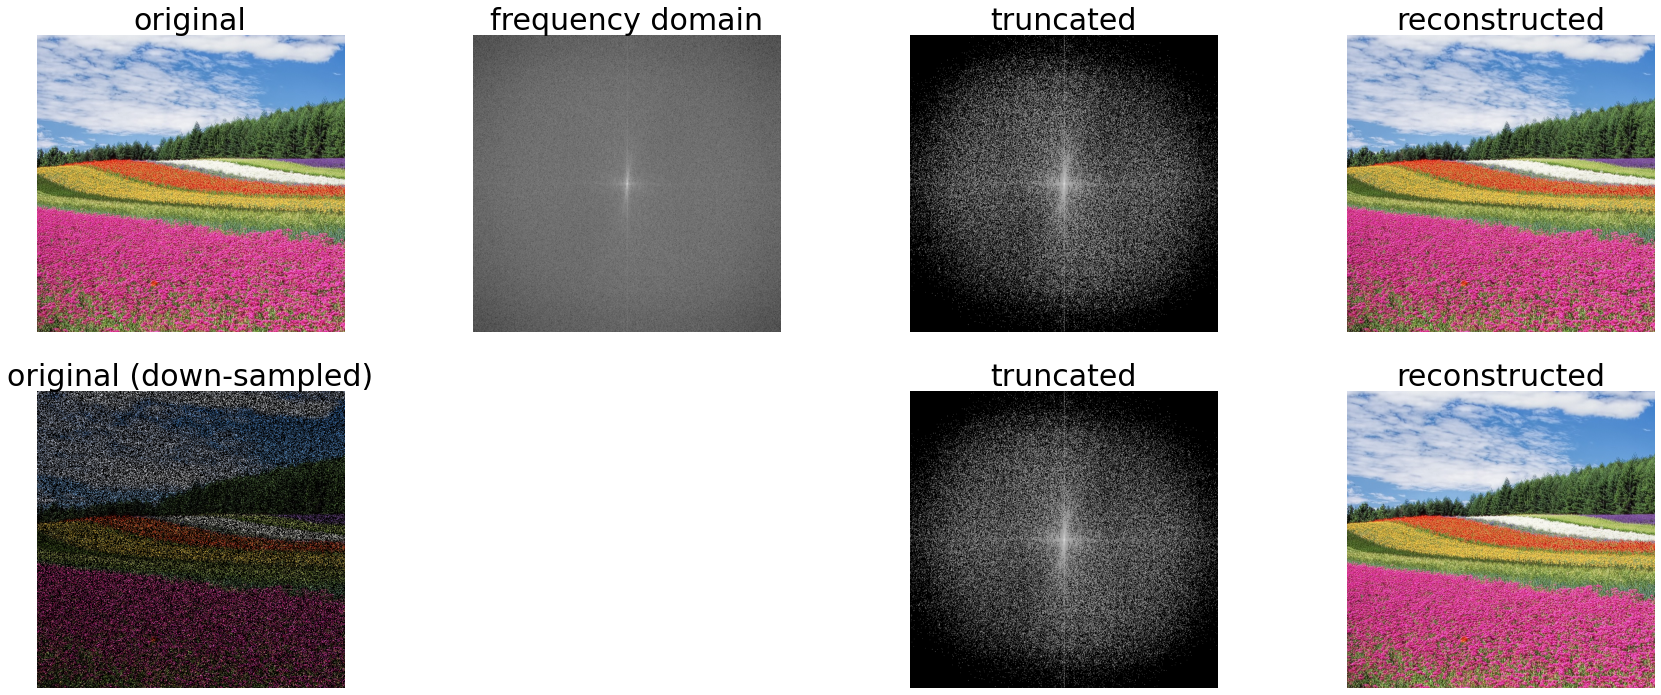

In [12]:
plt_4_figures(True)
plt_3_figures(True)
plt.savefig("paper_figs/cs_intuition_raw.svg", bbox_inches='tight')

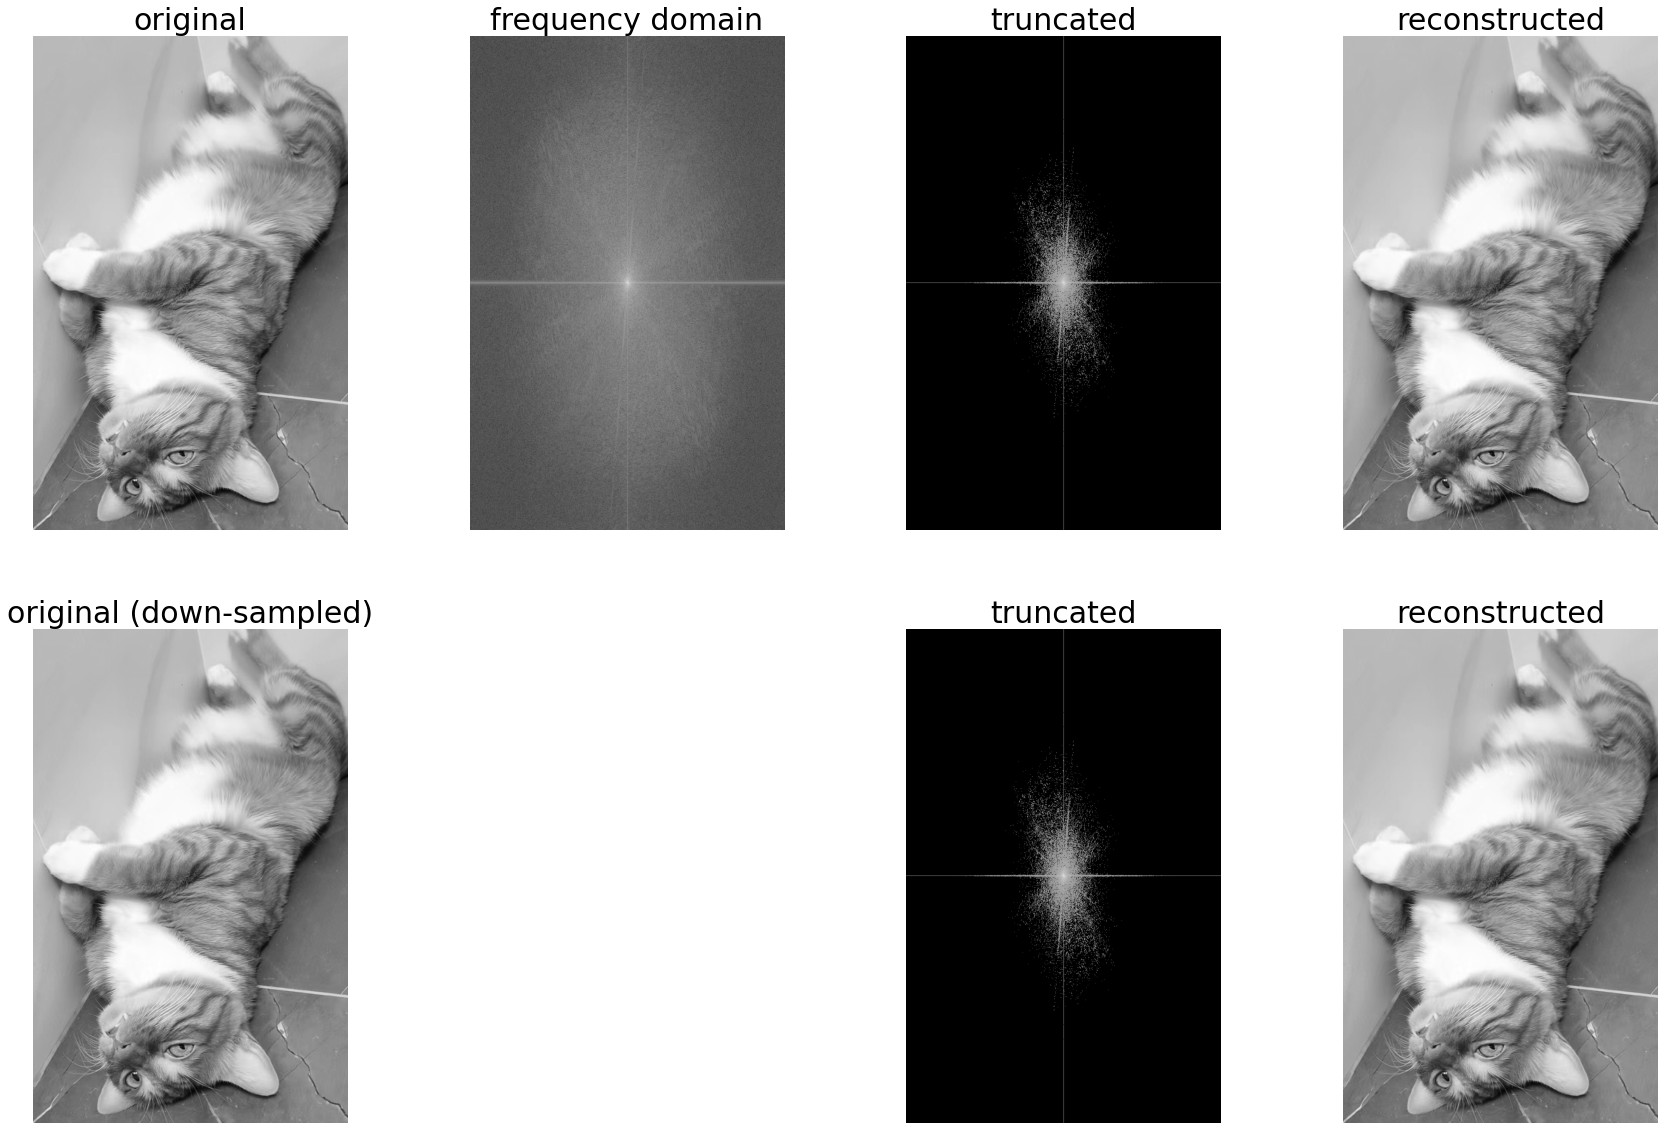

In [4]:

plt_4_figures(False)
plt_3_figures(False)

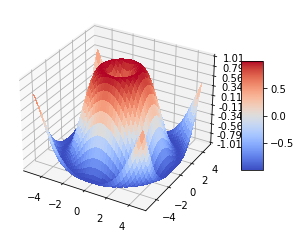

In [1]:
def gen_landscape():
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    import numpy as np
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Make data.
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

    return Z
Z = gen_landscape()